In [1]:
import numpy as np
import pandas as pd
import matplotlib . pyplot as plt 

raed the file

In [2]:
df=pd.read_csv(r".\heart_2.csv")

see the data

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


start EDA for cheking the daat :

first let's check the data to see is there any outlier or no ...!

# outliers : `IsolationForest`

In [6]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1, random_state=42)
int_columns_df = df.select_dtypes(include=['int64' ,  'float64'])

df['outlier'] = iso.fit_predict(df[int_columns_df.columns])

# -1 = Outlier, 1 = Normal
df_no_outlier=df[df['outlier'] == 1]
df_with_out =df[df['outlier'] == -1]
df_with_out.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,outlier
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,-1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,-1
11,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0,-1
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0,-1
27,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0,-1


let's plot it :

In [7]:
df_no_outlier.shape

(923, 15)

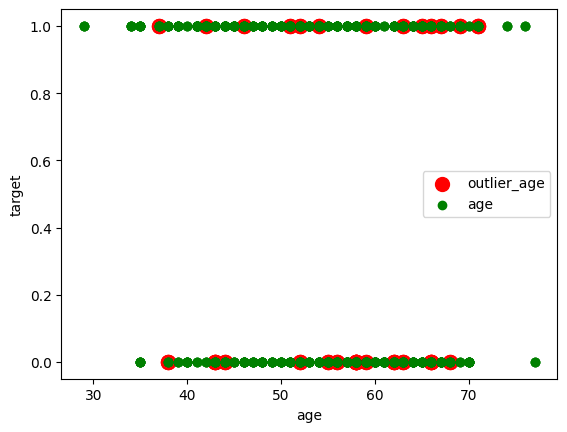

In [8]:
plt.scatter (df_with_out["age"] , df_with_out["target"]  , color="red" , label="outlier_age" , s=100)
plt.scatter (df["age"] , df["target"]  , color="green" , label="age")
plt.xlabel("age")
plt.ylabel("target")
plt.legend()
plt.show()

Descriptive statistics for outliers:
              age         sex          cp    trestbps        chol         fbs  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean    56.284314    0.480392    1.176471  145.303922  271.774510    0.568627   
std      9.609584    0.502083    1.238106   23.928850   80.454268    0.497714   
min     37.000000    0.000000    0.000000  110.000000  164.000000    0.000000   
25%     51.000000    0.000000    0.000000  128.000000  226.000000    0.000000   
50%     58.000000    0.000000    1.000000  140.000000  250.000000    1.000000   
75%     64.500000    1.000000    2.000000  160.000000  313.000000    1.000000   
max     71.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean     0.490196  145.705882    0.490196    2.087255    0.843137    1.

C:\Users\p-fr\AppData\Local\Temp\ipykernel_17092\3076426164.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='outlier', data=df, palette=['red', 'green'])


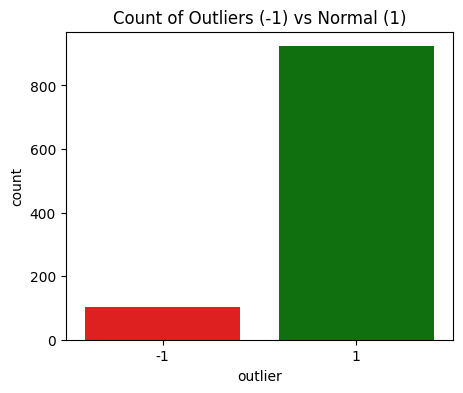

In [9]:


print("Descriptive statistics for outliers:")
print(df_with_out.describe())


outlier_percentage = (len(df_with_out) / len(df)) * 100
print(f"\nNumber of outliers: {len(df_with_out)}")
print(f"Total samples: {len(df)}")
print(f"Percentage of outliers: {outlier_percentage:.2f}%")


import seaborn as sns


plt.figure(figsize=(5,4))
sns.countplot(x='outlier', data=df, palette=['red', 'green'])
plt.title('Count of Outliers (-1) vs Normal (1)')
plt.show()


make df mark agein :

In [10]:
df=df_no_outlier
df.shape

(923, 15)

# feature & target & train/test

In [11]:
from sklearn.model_selection import train_test_split 
x=df.drop(["target","outlier"], axis=1)
y=df["target"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# StandardScaler 

In [12]:
from sklearn.preprocessing import  StandardScaler 
# Standardize features by removing mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the testing data
X_test = scaler.transform(X_test)

In [13]:
X_train.shape  , X_test.shape 

((738, 13), (185, 13))

# plot

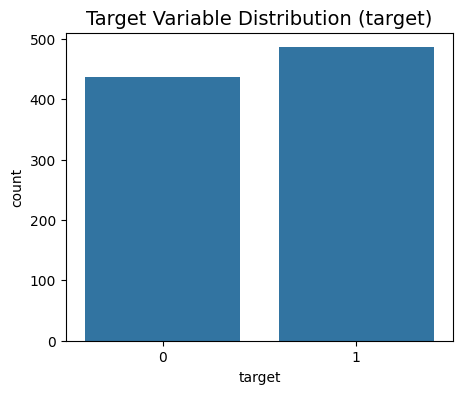

In [14]:
# 1️⃣ plot by y
import seaborn as sns
plt.figure(figsize=(5,4))
sns.countplot(data=df_no_outlier, x='target')
plt.title('Target Variable Distribution (target)', fontsize=14)
plt.show()

no Smot needed!

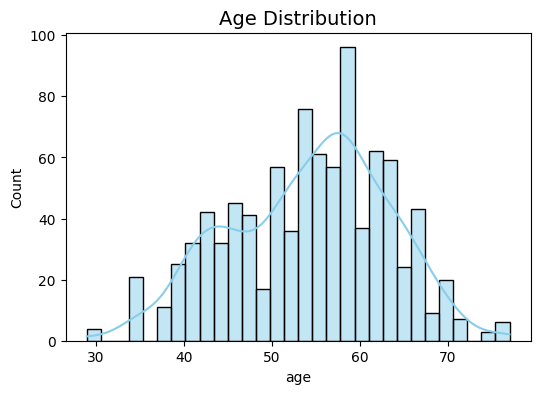

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(data=df_no_outlier, x='age', kde=True, bins=30, color='skyblue')
plt.title('Age Distribution', fontsize=14)
plt.show()

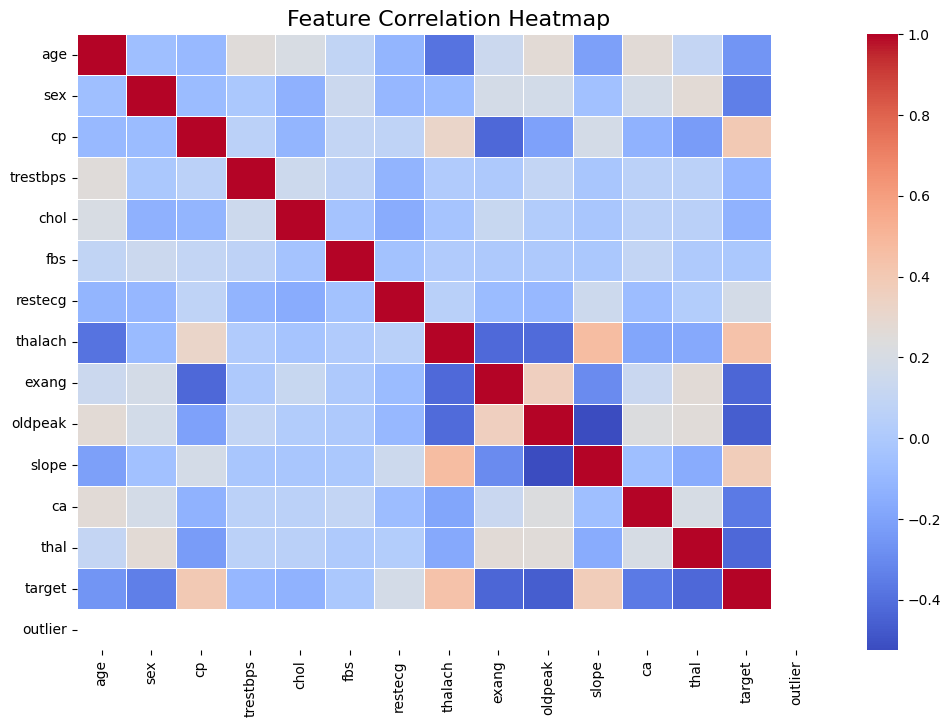

In [16]:
#  Feature Correlation Matrix
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()


it seems that target is related more to these ones:
* Slope
* thalach
* cp

let's be sure about that :

use **<span style="font-size:30px;">RandomForest</span>** to find most important feature :

     Feature  Importance
12      thal    0.151076
7    thalach    0.116650
9    oldpeak    0.113908
11        ca    0.113209
2         cp    0.110026
0        age    0.088901
4       chol    0.079767
3   trestbps    0.062285
8      exang    0.049122
1        sex    0.044731
10     slope    0.041610
6    restecg    0.022995
5        fbs    0.005722


C:\Users\p-fr\AppData\Local\Temp\ipykernel_17092\1411881517.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importances, x='Importance', y='Feature', palette='viridis')


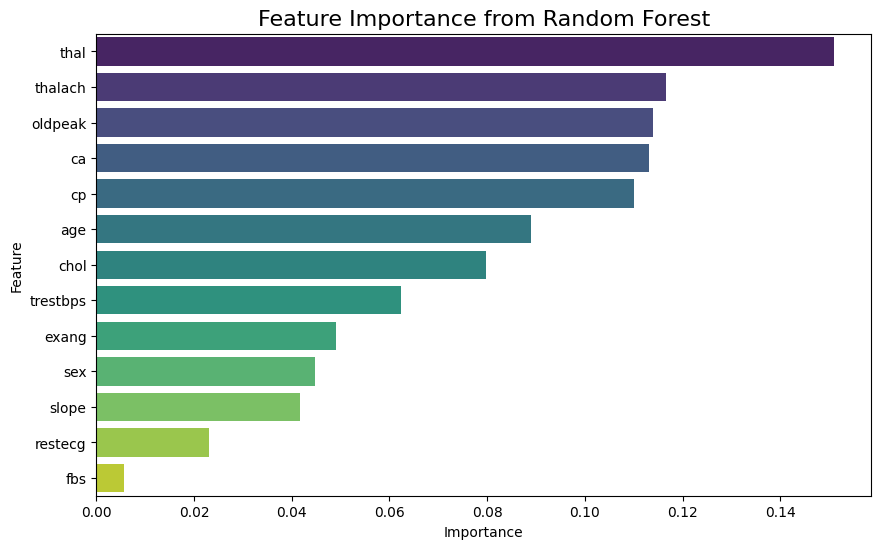

In [17]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# RandomForest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# importance :
importances = rf_model.feature_importances_

# make DataFrame 
feat_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


print(feat_importances)

# plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.show()


it seems that thal     and thalach     and oldpeak     are the most important one !

In [18]:
df_copy=df.copy()

first make a ANN with real dataset :

In [19]:
X_train.shape

(738, 13)

make a function for the model :

In [20]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

def model_maker(input_dim, output_dim, 
                X_train, y_train, 
                X_test, y_test, 
                epochs=100):

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),

        tf.keras.layers.Dense(64, activation='relu', 
                              kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Dense(32, activation='relu', 
                              kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Dense(16, activation='relu', 
                              kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Dense(8, activation='relu', 
                              kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=epochs,
        callbacks=[early_stop],
        verbose=1
    )

    loss, acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, acc


test it 

In [21]:
model, history, acc =model_maker(13, 2, 
                X_train, y_train, 
                X_test, y_test, 
                epochs=100)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.5424 - loss: 1.6434 - val_accuracy: 0.6554 - val_loss: 1.5488
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6203 - loss: 1.5129 - val_accuracy: 0.7500 - val_loss: 1.4291
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6458 - loss: 1.4044 - val_accuracy: 0.7568 - val_loss: 1.3132
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6898 - loss: 1.2970 - val_accuracy: 0.8041 - val_loss: 1.2104
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7559 - loss: 1.2058 - val_accuracy: 0.8446 - val_loss: 1.1173
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7780 - loss: 1.1241 - val_accuracy: 0.8581 - val_loss: 1.0300
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7983 - loss: 1.0182 - val_accuracy: 0.8514 - val_loss: 0.9506
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8169 - loss: 0.9431 - val_accuracy: 0.

get summery

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,976 (42.88 KB)

 Trainable params: 3,658 (14.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,318 (28.59 KB)

get accuracy

In [23]:
acc

0.9351351261138916

plot it

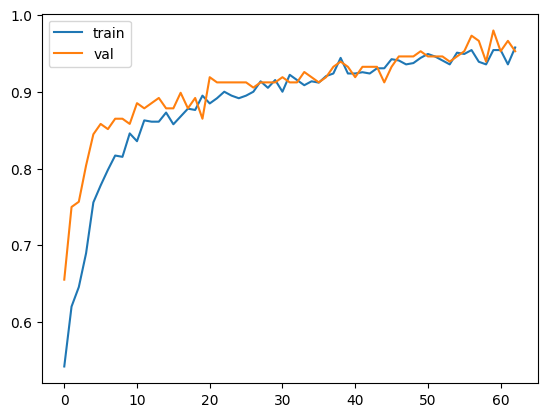

In [24]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

now change the output to 1 noron with Dense(1, activation='sigmoid')
loss='binary_crossentropy':

In [25]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

def model_maker_2(input_dim, 
                X_train, y_train, 
                X_test, y_test, 
                epochs=100):

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),

        tf.keras.layers.Dense(64, activation='relu', 
                              kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Dense(32, activation='relu', 
                              kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Dense(16, activation='relu', 
                              kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Dense(8, activation='relu', 
                              kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),

       
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=epochs,
        callbacks=[early_stop],
        verbose=1
    )

    loss, acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, acc


In [26]:
model, history, acc =model_maker_2(13,
                X_train, y_train, 
                X_test, y_test, 
                epochs=100)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5220 - loss: 1.6439 - val_accuracy: 0.7162 - val_loss: 1.5224
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5966 - loss: 1.5180 - val_accuracy: 0.7432 - val_loss: 1.4241
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6847 - loss: 1.3959 - val_accuracy: 0.7838 - val_loss: 1.3170
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7508 - loss: 1.2844 - val_accuracy: 0.7905 - val_loss: 1.2024
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7475 - loss: 1.2132 - val_accuracy: 0.8108 - val_loss: 1.1065
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7661 - loss: 1.1331 - val_accuracy: 0.8176 - val_loss: 1.0310
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8085 - loss: 1.0429 - val_accuracy: 0.8243 - val_loss: 0.9653
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7780 - loss: 1.0064 - val_accuracy: 0.

det accuracy:

In [27]:
acc

0.9567567706108093

plot it :

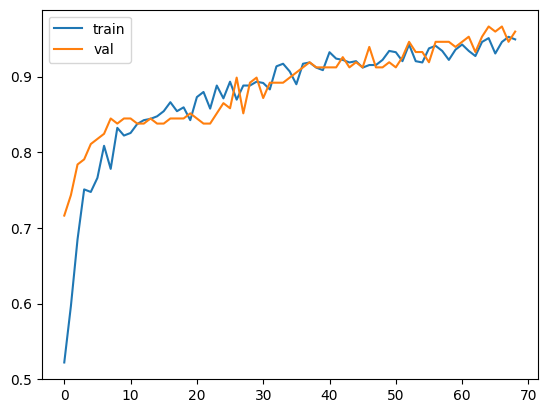

In [28]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()